In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
exp_name = 'exp_4_8'

In [15]:
from tensorflow.keras.models import load_model 

In [16]:
model = load_model('results/{exp_name}/gen.h5'.format(exp_name=exp_name))

W0701 19:10:10.657108  2976 deprecation.py:506] From C:\Users\Ramiro\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0701 19:10:10.681106  2976 deprecation.py:506] From C:\Users\Ramiro\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0701 19:10:13.600106  2976 deprecation.py:323] From C:\Users\Ramiro\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from t

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 46, 8)             248       
_________________________________________________________________
lambda (Lambda)              (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_2 (Dense)              (None, 265)               135945    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               34048     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 174,978
Trainable params: 174,978
Non-trainable params: 0
________________________________________________

In [18]:
embedding = model.layers[0].get_weights()[0]
vocab_size = embedding.shape[0]
vocab_size

31

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
anomal = np.array([6, 7, 9, 11, 12, 13, 14, 18, 23, 26, 28]) + 1

In [20]:
for i in anomal:
    for j in range(0, vocab_size):
        print(i, j, cosine_similarity(embedding[i].reshape(1, -1), embedding[j].reshape(1, -1))[0][0], j in anomal)

7 0 0.6021378 False
7 1 0.038521975 False
7 2 -0.6215941 False
7 3 -0.1316539 False
7 4 -0.50804925 False
7 5 -0.5052257 False
7 6 -0.45556608 False
7 7 1.0 True
7 8 0.6557762 True
7 9 -0.7555224 False
7 10 0.48765185 True
7 11 -0.5410001 False
7 12 0.22206312 True
7 13 0.085357696 True
7 14 0.35135287 True
7 15 0.012721553 True
7 16 0.106515884 False
7 17 -0.7410978 False
7 18 0.44551137 False
7 19 -0.42372 True
7 20 0.13754472 False
7 21 -0.51106715 False
7 22 0.12944119 False
7 23 -0.5780705 False
7 24 0.3914944 True
7 25 0.62066823 False
7 26 -0.38229576 False
7 27 0.04193896 True
7 28 0.17194334 False
7 29 0.31236723 True
7 30 -0.20130104 False
8 0 0.62505513 False
8 1 -0.10386654 False
8 2 -0.5321223 False
8 3 -0.12516922 False
8 4 -0.34007907 False
8 5 -0.5606297 False
8 6 -0.19263208 False
8 7 0.6557762 True
8 8 0.9999999 True
8 9 -0.74207854 False
8 10 0.39564043 True
8 11 -0.8836833 False
8 12 -0.1864584 True
8 13 0.16950361 True
8 14 0.40551293 True
8 15 0.04194042 True
8 16

In [24]:
for i in range(0, vocab_size):
    all_cos = []
    for j in range(0, vocab_size):
        cos = cosine_similarity(embedding[i].reshape(1, -1), embedding[j].reshape(1, -1))[0][0]
        all_cos.append(cos)

    all_cos = np.array(all_cos)

    top_k_cos = np.argsort(all_cos)[-6:][::-1][1:]

    print(i, top_k_cos, all_cos[top_k_cos], [x in anomal for x in top_k_cos])
    print("-----------------")

0 [ 8  7 24  3 25] [0.62505513 0.6021378  0.5555428  0.38155812 0.29803264] [True, True, True, False, False]
-----------------
1 [26 12 13  5 15] [0.80421525 0.69007707 0.5381634  0.5266242  0.5199304 ] [False, True, True, False, True]
-----------------
2 [19  6  4 23 21] [0.78553903 0.7059236  0.6650075  0.62090075 0.58590674] [True, False, False, False, False]
-----------------
3 [ 4 16 23 21 19] [0.6257525  0.60248554 0.55161023 0.52863234 0.5075299 ] [False, False, False, False, True]
-----------------
4 [ 2  3 19 23 17] [0.6650075  0.6257525  0.59255874 0.5816411  0.5747503 ] [False, False, True, False, False]
-----------------
5 [26 11  9 17 21] [0.6980057  0.6878689  0.6442866  0.61124444 0.5927352 ] [False, False, False, False, False]
-----------------
6 [19 16  2  4  3] [0.8515867  0.7305904  0.7059236  0.4696642  0.33813384] [True, False, False, False, False]
-----------------
7 [ 8 25  0 10 18] [0.6557762  0.62066823 0.6021378  0.48765185 0.44551137] [True, False, False, Tru

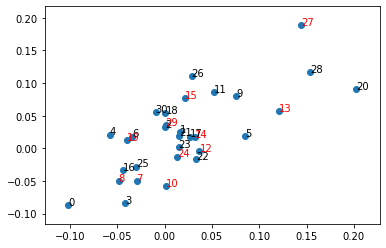

In [73]:
x = [symbol[0]  for symbol in embedding]
y = [symbol[1]  for symbol in embedding]
symbols = list(range(vocab_size))
plt.scatter(x, y) 

for i, symbol in enumerate(symbols):
    color = 'red' if symbol in anomal else 'black'
    plt.annotate(symbol, (x[i], y[i]), color=color)

In [74]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

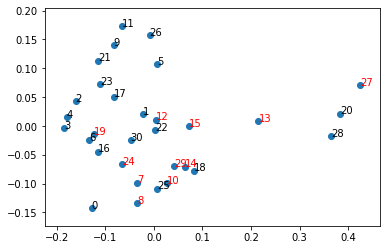

In [88]:
x = PCA(n_components=2).fit_transform(embedding)
x = x.transpose()
symbols = list(range(vocab_size))
plt.scatter(x[0], x[1]) 

for i, symbol in enumerate(symbols):
    color = 'red' if symbol in anomal else 'black'
    plt.annotate(symbol, (x[0][i], x[1][i]), color=color)

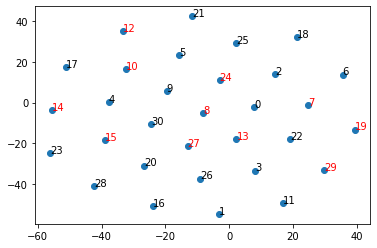

In [90]:
x = TSNE(n_components=2).fit_transform(embedding)
x = x.transpose()
symbols = list(range(vocab_size))
plt.scatter(x[0], x[1]) 

for i, symbol in enumerate(symbols):
    color = 'red' if symbol in anomal else 'black'
    plt.annotate(symbol, (x[0][i], x[1][i]), color=color)